In [153]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
import networkx as nx

In [67]:


c=[100,200]
#c = np.array([c])
a=[20,25]
b=[0.05,0.10]
#pmin = [0,0]
pmax = [440,300]

B= np.diag(b)
p = cvx.Variable(2) # power thermo unit
d=40

In [58]:
for t in range(2):
    f_ecn = (1/2*cvx.quad_form(p,B) +p*a +c[t])

    res= [sum(p) >= d ,  p<=pmax]
obj=cvx.Minimize(f_ecn)
Model = cvx.Problem(obj,res)
Model.solve()


c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 43 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 44 times so far.

  warnings.warn(msg, UserWarning

1010.0000000000002

In [59]:
p.value
print("Incremental Cost:",res[0].dual_value)
#print(res[1].value)

Incremental Cost: 23.000000000000043


In [150]:
def ed(c,a,pmax,d,pmin):# despacho simple

    B= np.diag(b)
    n=len(pmax)
    p = cvx.Variable(n)
    for t in range(n):
        f_ecn = (1/2*cvx.quad_form(p,B) +p*a +c[t])

        res= [sum(p) >= d,p<=pmax,p>=pmin]
    obj=cvx.Minimize(f_ecn)
    Model = cvx.Problem(obj,res)
    print("costo",Model.solve())
    print("Incremental Cost:",res[0].dual_value)
    print("Incremental Cost 1:",res[1].dual_value)
    print("Incremental Cost 2:",res[2].dual_value)
    return(p.value)
d=40
pmin=[0,0]
c=[100,200]
a=[20,25]
b=[0.05,0.10]
pmin = [0,0]
pmax = [440,300]
ed(c,a,pmax,d,pmin)
d=250
ed(c,a,pmax,d,pmin)
d=300
ed(c,a,pmax,d,pmin)

    

costo 1040.0
Incremental Cost: 22.000000000000064
Incremental Cost 1: [0. 0.]
Incremental Cost 2: [0. 3.]
costo 6575.0
Incremental Cost: 29.999999999999716
Incremental Cost 1: [0. 0.]
Incremental Cost 2: [0. 0.]
costo 8116.666666666666
Incremental Cost: 31.666666666666288
Incremental Cost 1: [0. 0.]
Incremental Cost 2: [0. 0.]


c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 158 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 159 times so far.

  warnings.warn(msg, UserWarni

array([233.33333333,  66.66666667])

In [151]:
d=600
ed(c,a,pmax,d,pmin)

costo 19116.666666666668
Incremental Cost: 41.66666666666572
Incremental Cost 1: [0. 0.]
Incremental Cost 2: [0. 0.]


c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 164 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 165 times so far.

  warnings.warn(msg, UserWarni

array([433.33333333, 166.66666667])

In [141]:
from lib2to3.pgen2 import pgen


ad=[55,50]
bd=[-0.2,-0.1]
d=[300,350]
pmax=[400,300]
pdmin=[0,0]
pdmax=[300,350]
def ed_elastic_D(c,a,pmax,d,ad,bd):# despacho demanda elastica

    B= np.diag(b)
    Bd= np.diag(bd)
    n=len(pmax)
    pg = cvx.Variable(n)
    pd = cvx.Variable(n)
    
    for t in range(n):
        f_dem= (1/2*cvx.quad_form(pd,Bd) +ad*pd)
        f_cop = (1/2*cvx.quad_form(pg,B) +a*pg +c)
        res= [sum(pg)-sum(pd)==0 ,pg<=pmax,pd<=d,pd>=pdmin]
    obj=cvx.Maximize(f_dem-f_ecn)#social wellfare
    Model = cvx.Problem(obj,res)
    print("costo",Model.solve())
    print("Incremental Cost:",res[0].dual_value)

    return(pg.value,pd.value,sum(pd.value))

In [142]:
a,b,pd=ed_elastic_D(c,a,pmax,d,ad,bd)
print(a,b,pd)

costo 25862.500017542887
Incremental Cost: -1.1362668960340788e-05
[325.56659319 299.43312296] [274.99971498 350.00000117] 624.9997161485634


c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 123 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 124 times so far.

  warnings.warn(msg, UserWarni

# Despacho economico con perdidas

In [152]:
def LoadFlow1(G):

    A = nx.incidence_matrix(G,oriented=True)
    Yp = np.diag([G.edges[k]["y"] for k in G.edges])# diagonal de la matrix de admitancia
    Ybus = A@Yp@A.T
    n = G.number_of_nodes()
    l=G.number_of_edges()
    YN0 = Ybus[1:n,0]
    YNN = Ybus[1:n,1:n]
    ZNN = np.linalg.inv(YNN)
    d = np.array([G.nodes[j]["d"] for j in G.nodes])
    dN=d[1:n]
    sN=np.zeros(n-1)
    v0 = 1+0j # voltaje en el nodo slack
    vN = np.ones(n-1)*v0
    for t in range(10):

        vN = ZNN@(np.conj((sN-dN)/vN)-v0*YN0)#fixedpoint 
        vT = np.hstack([v0,vN])
        sT = vT*np.conj(Ybus@vT)
        err = np.linalg.norm(sT[1:n]-(sN-dN))
    

    ST = vT*np.conj(Ybus@vT)
    pL1 = sum(ST)
    
    for (k,m) in G.edges:
        Sf1 = Ybus[k,m]*(vT[k]-vT[m])
        print("flow",(k,m),np.abs(Sf1))
    print("Loss",pL1)
    print("Load Flow, after 10 iterations the error is",err)
    import pandas as pd
    results = pd.DataFrame()
    results["name"] = [G.nodes[k]["name"] for k in G.nodes]
    results["vpu"] = np.abs(vT)
    results["ang"] = np.angle(vT)*180/np.pi
    results["pnode"] = np.round(ST.real,n)
    results["qnode"] = np.round(ST.imag,n)
    display(results)
    return vT,ST,Ybus


In [ ]:
def red(nodos,lineas):
    G = nx.DiGraph()

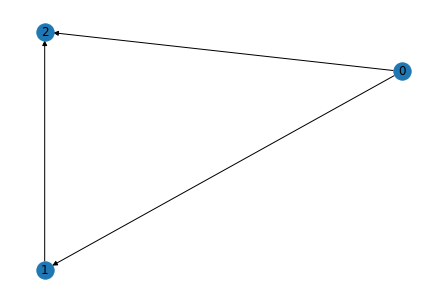

In [154]:
G = nx.DiGraph()

G.add_node(0,name="0",smax=400,d=0)
G.add_node(1,name="1",smax=300,d=0)
G.add_node(2,name="2",smax=0,d=250)

G.add_edge(0,1,y=1/(0.02+0.1j))
G.add_edge(0,2,y=1/(0.02+0.1j))
G.add_edge(1,2,y=1/(0.02+0.1j))
nx.draw(G,with_labels=True,pos=nx.spectral_layout(G))

In [155]:
LoadFlow1(G)

C:\Users\uer\AppData\Local\Temp\ipykernel_3896\2109060952.py:3: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.incidence_matrix(G,oriented=True)


flow (0, 1) 3.386960399374912
flow (0, 2) 6.773920798749824
flow (1, 2) 3.386960399374912
Loss (1.3765800896320632+6.88290044816032j)
Load Flow, after 10 iterations the error is 258.8511495182426


,name,vpu,ang,pnode,qnode
0,0,1.000000,0.000000,-7.475,6.883
1,1,0.871840,19.779965,-0.000,-0.000
2,2,0.871101,42.640186,8.851,0.000


(array([1.        +0.j        , 0.82040045+0.29503832j,
        0.6408009 +0.59007663j]),
 array([-7.47456943e+00+6.88290045e+00j, -7.28661973e-16-2.62046666e-16j,
         8.85114952e+00+2.66453526e-15j]),
 array([[ 3.84615385-19.23076923j, -1.92307692 +9.61538462j,
         -1.92307692 +9.61538462j],
        [-1.92307692 +9.61538462j,  3.84615385-19.23076923j,
         -1.92307692 +9.61538462j],
        [-1.92307692 +9.61538462j, -1.92307692 +9.61538462j,
          3.84615385-19.23076923j]]))

In [176]:
Omega=[]
for (k,m) in G.edges:
    Omega.append((k,m))
Omega=tuple(Omega)
print(Omega)

((0, 1), (0, 2), (1, 2))


In [157]:
c=[100,200,0]
#c = np.array([c])
a=[20,25,0]
b=[0.05,0.10,0]
#pmin = [0,0]
pmin=[0,0,0]
ed(c,a,pmax,d,pmin)

costo 6375.003691599173
Incremental Cost: [-4.16333634e-15 -4.16333634e-15  3.00000407e+01]
Incremental Cost 1: [  0.           0.         291.02275138]
Incremental Cost 2: [0.00000000e+00 1.28309488e-15 2.61022733e+02]


c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 166 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 167 times so far.

  warnings.warn(msg, UserWarni

array([ 2.00000053e+02,  5.00000698e+01, -1.84247615e-05])

In [228]:
pmax = list([G.nodes[j]["smax"] for j in G.nodes])
Lambda
l=[]
for i in pmax:
    if i !=0:
        l.append(pmax.index(i))
l

[0, 1]

In [239]:
pmax = list([G.nodes[j]["smax"] for j in G.nodes])

In [250]:
pmax = list([G.nodes[j]["smax"] for j in G.nodes])
pmax
pmax=pmax[:2]
pmax

[400, 300]

In [263]:
def ed_pl(G,ng,snom,a,b,c,smax,d):
    
    nn=len(G.nodes)
    nl = len(G.edges)
    B= np.diag(b)
    smax = nl*[smax] #flujo max por lineas 
    pmax = list([G.nodes[j]["smax"] for j in G.nodes])
    d1 = list([G.nodes[j]["d"] for j in G.nodes])
    Lambda=[]
    for i in  pmax:
        if i !=0:
            Lambda.append(pmax.index(i))
    Lambda=tuple(Lambda)
    pmax=pmax[:ng]
    s = cvx.Variable(nl) # power flows
    Omega=[]
    for (k,m) in G.edges:
        Omega.append((k,m))
    Omega=tuple(Omega)
    EqB = nn*[0] # equation of balance of energy
    for j in range(nl):
        k = Omega[j][0]
        m = Omega[j][1]
        EqB[k] += s[j] # flow in departing from k
        EqB[m] += -s[j] # flow arriving to k
    for k in range(ng):
        n1 = Lambda[k]
        EqB[n1] += -p[k]
    res = [p>=pmin, p<=pmax, s<=smax, -s<=smax]
    for k in range(nn):
        res += [EqB[k] + d[k] ==0]
    for t in range(ng):
        obj = (1/2*cvx.quad_form(p,B) +p*a +c[t])
    
    x = nl*[0.1]
    th = cvx.Variable(nn) # nodal angles
    res += [th[0] == 0] # angle reference
    for j in range(nl):
        k = Omega[j][0]
        m = Omega[j][1]
        res += [x[j]*s[j] == snom*(th[k]-th[m])] # aproximacion 
    ModelLPF = cvx.Problem(cvx.Minimize(obj),res)
    ModelLPF.solve()
    print("Generation:",(p.value))
    print("Flows:",(s.value))
    print("th:",(th.value))
    print("costo",ModelLPF.solve())
    print("Incremental Cost:",res[5].dual_value)

In [264]:
a=[20,25]
b=[0.05,0.10]
c=[100,200]
ng=2
snom=200
smax = 400
d=[0,0,250]
ed_pl(G,ng,snom,a,b,c,smax,d)

Generation: [200.  50.]
Flows: [ 50. 150. 100.]
th: [-7.47137348e-21 -2.50000000e-02 -7.50000000e-02]
costo 6575.0
Incremental Cost: 30.000000000000128


c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 239 times so far.

  warnings.warn(msg, UserWarning)
c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 240 times so far.

  warnings.warn(msg, UserWarni

In [246]:
pmax = [400,300,0]
Lambda=[]
for i in  pmax:
    print(i)
    if i !=0:
        Lambda.append(Lambda.index(i))
Lambda=tuple(Lambda)
print(Lambda)

400


ValueError: 400 is not in list

In [244]:
ng = 2 # number of generators
nl = 3 # number of lines
nn = 3 # number of nodes
pmax = [400,300,0]
smax = nl*[400]

pmin=[0,0]
d = [0,0,250] # demand
Lambda=[]
for i in  pmax:
    if i !=0:
        Lambda.append(Lambda.index(i))
Lambda=tuple(Lambda)
print(Lambda)
Omega = ((0, 1), (0, 2), (1, 2))
c=[100,200]

#c = np.array([c])
a=[20,25]
b=[0.05,0.10]
B= np.diag(b)
c=[100,200]
# grid
s = cvx.Variable(nl) # power flows
p= cvx.Variable(ng)
EqB = nn*[0] # equation of balance of energy
for j in range(nl):
    k = Omega[j][0]
    m = Omega[j][1]
    EqB[k] += s[j] # flow in departing from k
    EqB[m] += -s[j] # flow arriving to k
for k in range(ng):
    n1 = Lambda[k]
    EqB[n1] += -p[k]
res = [p>=pmin, p<=pmax, s<=smax, -s<=smax]
for k in range(nn):
    res += [EqB[k] + d[k] ==0]
for t in range(ng):
    obj = (1/2*cvx.quad_form(p,B) +p*a +c[t])


snom = 200
x = nl*[0.05]
th = cvx.Variable(nn) # nodal angles
res += [th[0] == 0] # angle reference
for j in range(nl):
    k = Omega[j][0]
    m = Omega[j][1]
    res += [x[j]*s[j] == snom*(th[k]-th[m])] # aproximacion 
ModelLPF = cvx.Problem(cvx.Minimize(obj),res)
ModelLPF.solve()
print("Generation:",(p.value))
print("Flows:",(s.value))
print("th:",(th.value))
print("costo",ModelLPF.solve())
print("Incremental Cost:",res[5].dual_value)



ValueError: 400 is not in list

In [198]:
ng = 6 # number of generators
nl = 9 # number of lines
nn = 6 # number of nodes
smax = nl*[300]
d = [0,800,0,0,400,0] # demand
Lambda = (0,0,2,2,3,5) # generators location
Omega = ((0, 1),(0,1),(0,3),(0,4),(1,2),(1,5),(2,5),(3,4),(4,5))
# grid
pmin = [10,10,35,35,125,130]
pmax = [125,150,210,225,315,325]
a = np.diag([0.30494,0.21174,0.07092,0.05606,0.03598,0.04222])
b = [38.5390,46.1591,38.3055,40.3965,38.2704,36.3278]
alpha = np.diag([0.00838,0.00838,0.01366,0.01366,0.00922,0.00922])
beta = [0.32767,0.32767,-0.54551,-0.54551,-0.51116,-0.51116]

p = cvx.Variable(6)

s = cvx.Variable(nl) # power flows
EqB = nn*[0] # equation of balance of energy
for j in range(nl):
    k = Omega[j][0]
    m = Omega[j][1]
    EqB[k] += s[j] # flow in departing from k
    EqB[m] += -s[j] # flow arriving to k
for k in range(ng):
    n1 = Lambda[k]
    EqB[n1] += -p[k]
res = [p>=pmin, p<=pmax, s<=smax, -s<=smax]
for k in range(nn):
    res += [EqB[k] + d[k] ==0]
    
obj = 1/2*cvx.quad_form(p,a)+b*p


snom = 100
x = nl*[0.02]
th = cvx.Variable(nn) # nodal angles
res += [th[0] == 0] # angle reference
for j in range(nl):
    k = Omega[j][0]
    m = Omega[j][1]
    res += [x[j]*s[j] == snom*(th[k]-th[m])]
ModelLPF = cvx.Problem(cvx.Minimize(obj),res)
ModelLPF.solve()
print("Generation:",np.round(p.value))
print("Flows:",np.round(s.value))
print("th:",(th.value))


c:\Users\uer\anaconda3\envs\gurobi\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 187 times so far.

  warnings.warn(msg, UserWarning)


Generation: [ 94. 100. 178. 188. 315. 325.]
Flows: [ 133.  133. -129.   57. -300. -234.   66.  186. -157.]
th: [-7.04059227e-20 -2.66206897e-02  3.33793103e-02  2.58275862e-02
 -1.13448276e-02  2.01379310e-02]


In [164]:
type(Omega)

tuple